In [1]:
!pip install torch torchvision

In [0]:
import torch
import matplotlib.pyplot as plt

In [0]:
def check_annealing(epochs, steps, model, optimizer, dict):
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=dict['t_max'], eta_min=0, last_epoch=-1)

    lr_list = [0. for i in range(epochs) for j in range(steps)]
    for epoch in range(epochs):
        for idx in range(steps):
        
            now_lr = scheduler.get_lr()
            #print(now_lr)
            lr_list[epoch*steps+idx] = now_lr
            optimizer.step()

            scheduler.step()
            if dict['t_max'] * dict['t_mult'] - steps == epoch * steps + idx:
                dict['t_max'] *= dict['t_mult']
                #print('Reset scheduler') 
                scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=dict['t_max'], eta_min=0, last_epoch=-1)
    return lr_list

In [0]:
def show_graph(lr_lists, epochs, steps, out_name):
    plt.clf()
    plt.rcParams['figure.figsize'] = [20, 5]
    x = list(range(epochs * steps))
    plt.plot(x, lr_lists, label="line L")
    plt.plot()

    plt.ylim(10e-5, 1)
    plt.yscale("log")
    plt.xlabel("iterations")
    plt.ylabel("learning rate")
    plt.title("Check Cosine Annealing Learing Rate with {}".format(out_name))
    plt.legend()
    plt.show()

In [0]:
#### Params ####
epochs = 100
steps = 200
lr = 1.
################

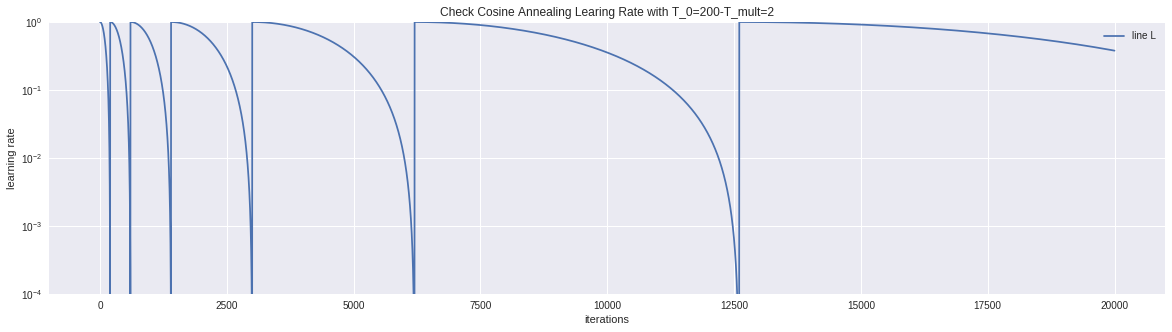

In [9]:
t01_tmult2 = {'epochs': epochs,
              'steps': steps,
               't_max': steps*1,
               't_mult': 2,
               'lr': lr,
               'out_name': "T_0={}-T_mult={}".format(steps*1, 2),
              }

model = torch.nn.Linear(10, 2)
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

t01_tmult2_out = check_annealing(epochs, steps, model, optimizer, t01_tmult2)
show_graph(t01_tmult2_out, epochs, steps, t01_tmult2['out_name'])

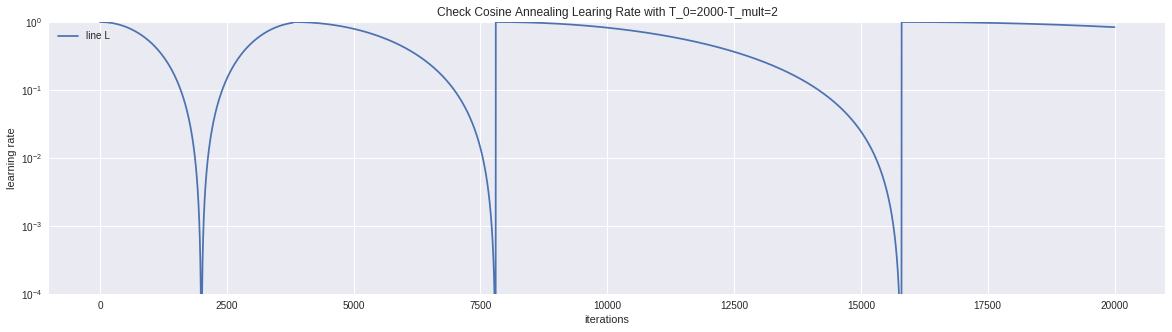

In [10]:
t010_tmult2 = {'epochs': epochs,
              'steps': steps,
               't_max': steps*10,
               't_mult': 2,
               'lr': lr,
               'out_name': "T_0={}-T_mult={}".format(steps*10, 2),
              }

model = torch.nn.Linear(10, 2)
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

t010_tmult2_out = check_annealing(epochs, steps, model, optimizer, t010_tmult2)
show_graph(t010_tmult2_out, epochs, steps, t010_tmult2['out_name'])

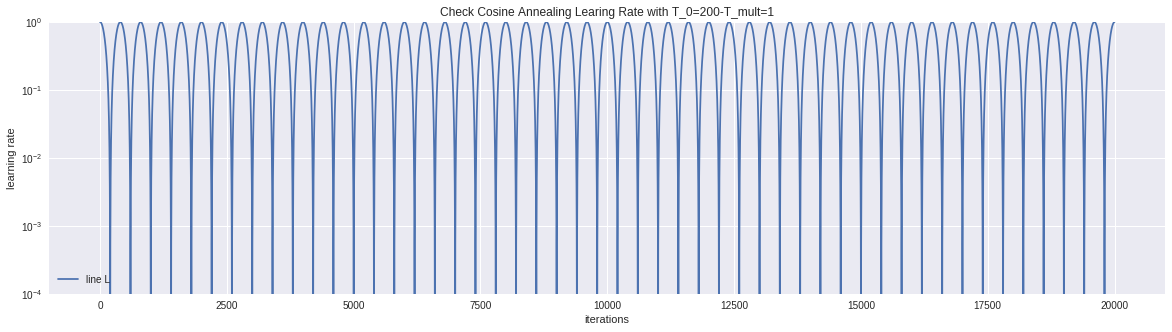

In [11]:
t01_tmult1 = {'epochs': epochs,
              'steps': steps,
               't_max': steps*1,
               't_mult': 1,
               'lr': lr,
               'out_name': "T_0={}-T_mult={}".format(steps*1, 1),
              }

model = torch.nn.Linear(10, 2)
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

t01_tmult1_out = check_annealing(epochs, steps, model, optimizer, t01_tmult1)
show_graph(t01_tmult1_out, epochs, steps, t01_tmult1['out_name'])

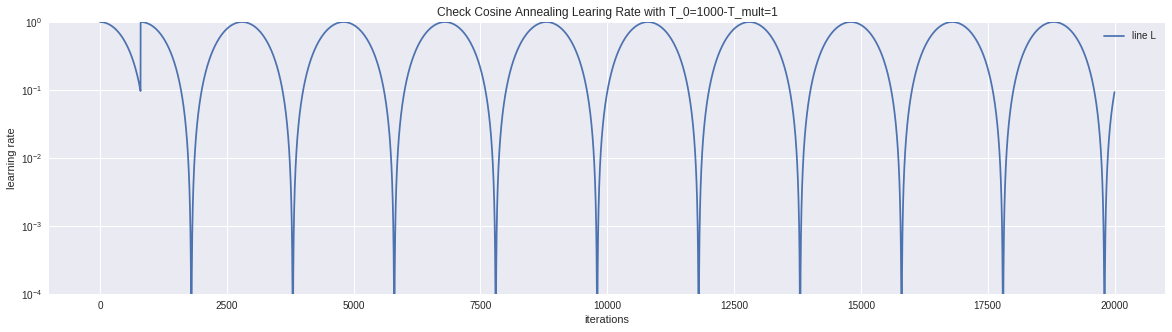

In [12]:
t05_tmult1 = {'epochs': epochs,
              'steps': steps,
               't_max': steps*5,
               't_mult': 1,
               'lr': lr,
               'out_name': "T_0={}-T_mult={}".format(steps*5, 1),
              }

model = torch.nn.Linear(10, 2)
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

t05_tmult1_out = check_annealing(epochs, steps, model, optimizer, t05_tmult1)
show_graph(t05_tmult1_out, epochs, steps, t05_tmult1['out_name'])

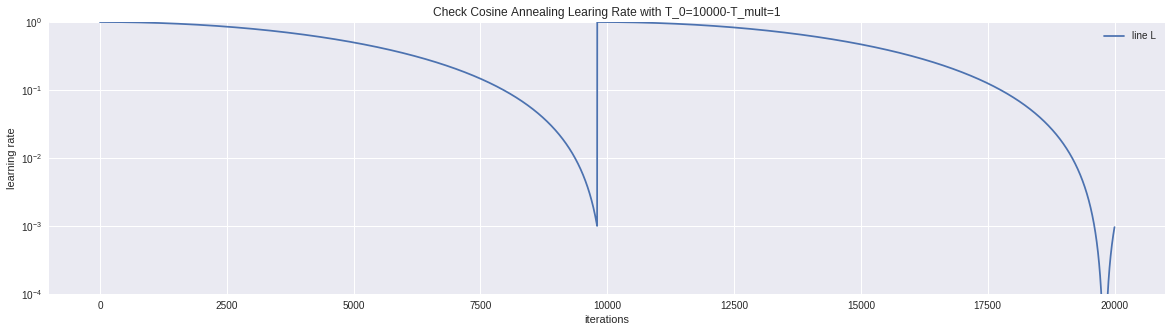

In [13]:
t050_tmult1 = {'epochs': epochs,
              'steps': steps,
               't_max': steps*50,
               't_mult': 1,
               'lr': lr,
               'out_name': "T_0={}-T_mult={}".format(steps*50, 1),
              }

model = torch.nn.Linear(10, 2)
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

t050_tmult1_out = check_annealing(epochs, steps, model, optimizer, t050_tmult1)
show_graph(t050_tmult1_out, epochs, steps, t050_tmult1['out_name'])

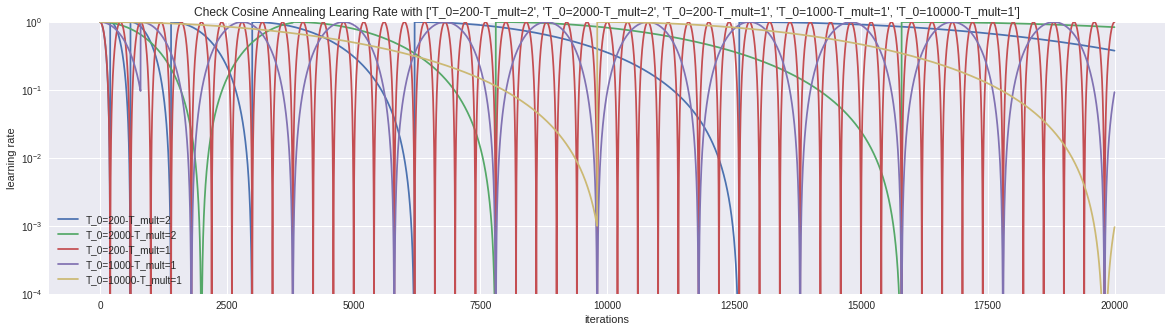

In [14]:
def show_graphes(list_name, lr_lists, epochs, steps):
    plt.clf()
    plt.rcParams['figure.figsize'] = [20, 5]
    x = list(range(epochs * steps))
    for l, ln in zip(lr_lists, list_name):
        plt.plot(x, l, label=ln)
    #plt.plot()

    plt.ylim(10e-5, 1)
    plt.yscale("log")
    plt.xlabel("iterations")
    plt.ylabel("learning rate")
    plt.title("Check Cosine Annealing Learing Rate with {}".format(list_name))
    plt.legend()
    plt.show()

show_graphes([t01_tmult2['out_name'], t010_tmult2['out_name'], t01_tmult1['out_name'], t05_tmult1['out_name'], t050_tmult1['out_name']],
             [t01_tmult2_out, t010_tmult2_out, t01_tmult1_out, t05_tmult1_out, t050_tmult1_out], 
             epochs, steps)